In [3]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%autosave 1

Autosaving every 1 seconds


In [5]:
# importing data
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/SuperStore.csv")

# **Data Wrangling**

In [6]:
print('Number of rows:', df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 9994
Number of columns: 20


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Customer_ID     9994 non-null   object 
 2   Postal_Code     9994 non-null   int64  
 3   Product_ID      9994 non-null   object 
 4   Sales           9994 non-null   float64
 5   Quantity        9994 non-null   int64  
 6   Discount        9994 non-null   float64
 7   Profit          9994 non-null   float64
 8   Category        9994 non-null   object 
 9   Sub-Category    9994 non-null   object 
 10  Product_Name    9994 non-null   object 
 11  Order_Date      9994 non-null   object 
 12  Ship_Date       9994 non-null   object 
 13  Ship_Mode       9994 non-null   object 
 14  Customer_Name   9994 non-null   object 
 15  Segment         9994 non-null   object 
 16  Country/Region  9994 non-null   object 
 17  City            9994 non-null   o

No missing values and all data types are okay

In [8]:
df.isna().sum()

Order_ID          0
Customer_ID       0
Postal_Code       0
Product_ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Category          0
Sub-Category      0
Product_Name      0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
dtype: int64

No missing values

In [9]:
df[df.duplicated(keep=False)]

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
3405,US-2017-150119,LB-16795,43229,FUR-CH-10002965,281.372,2,0.3,-12.0588,Furniture,Chairs,Global Leather Highback Executive Chair with P...,4/23/2017,4/27/2017,Standard Class,Laurel Beltran,Home Office,United States,Columbus,Ohio,East
3406,US-2017-150119,LB-16795,43229,FUR-CH-10002965,281.372,2,0.3,-12.0588,Furniture,Chairs,Global Leather Highback Executive Chair with P...,4/23/2017,4/27/2017,Standard Class,Laurel Beltran,Home Office,United States,Columbus,Ohio,East


there are a duplicate values


In [10]:
#delete the duplicate values
df.drop_duplicates(inplace=True)

In [11]:
df[df.duplicated(keep=False)]

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region


In [12]:
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [13]:
# drop useless features like Country/Region because it contain only United States
df.drop(['Country/Region'], axis=1,inplace=True)

## **Exploratory Data Analysis**

In [34]:
df.describe()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.567998,229.852846,3.789753,0.156188,28.660971
std,32065.085638,623.276074,2.225149,0.206457,234.271476
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [15]:
df_corr = df.corr()
df_corr

<ipython-input-15-0c96883f2151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,Postal_Code,Sales,Quantity,Discount,Profit
Postal_Code,1.000000,-0.023851,0.012731,0.058471,-0.029968
Sales,-0.023851,1.000000,0.200808,-0.028197,0.479067
Quantity,0.012731,0.200808,1.000000,0.008680,0.066241
Discount,0.058471,-0.028197,0.008680,1.000000,-0.219481
Profit,-0.029968,0.479067,0.066241,-0.219481,1.000000


<ipython-input-16-8be544ac011f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True,cmap= blue);


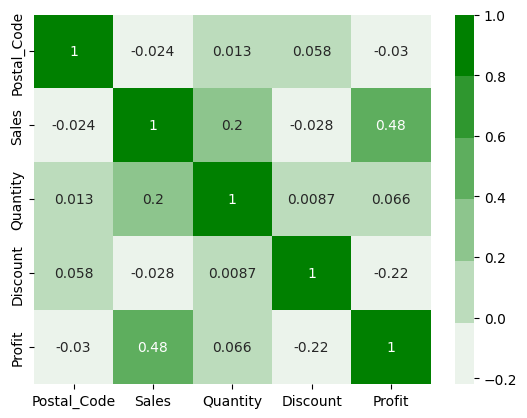

In [16]:
blue= sns.light_palette("green")
sns.heatmap(df.corr(), annot = True,cmap= blue);


we notice there's correlation between (profit, discount) and (profit, sales) and (quantity, sales)






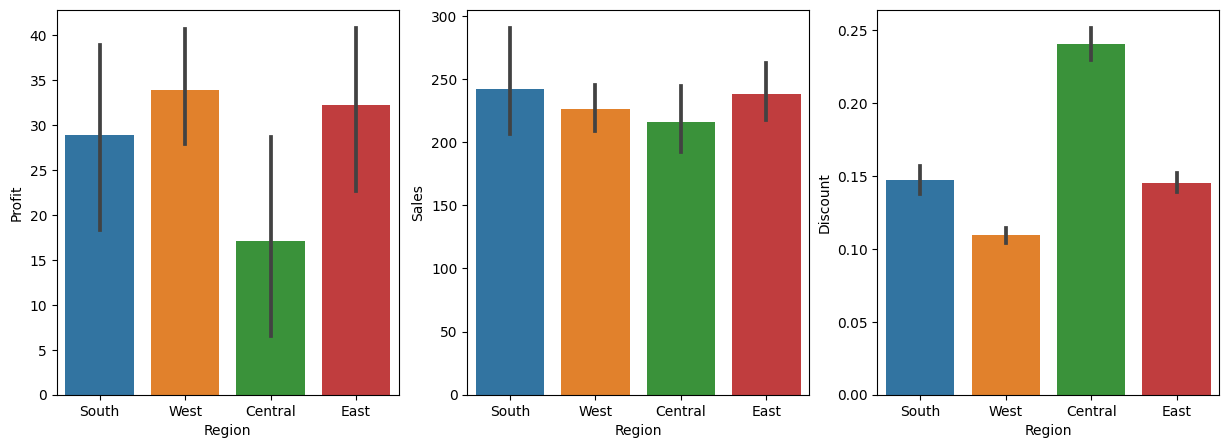

In [17]:
#Check Profit, Sales and Discount for each Region
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Region', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Region', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Region', y='Discount', data=df, ax=ax[2])
plt.show()

* West region has the highest profit and find same region has the lowest discount

* South has the highest sales

* Central has the lowest profit and has the highest discount
and maybe that's the reason

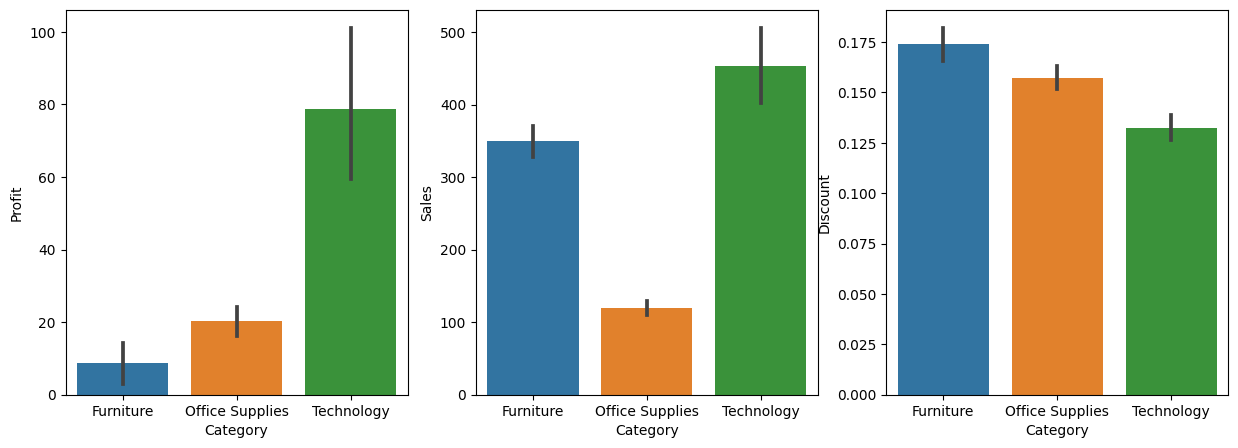

In [18]:
#Check Profit, sales, and Discount For each Category
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Category', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Category', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Category', y='Discount', data=df, ax=ax[2])
plt.show()

* Furniture sales is high but has very low profit maybe high discount is the reason

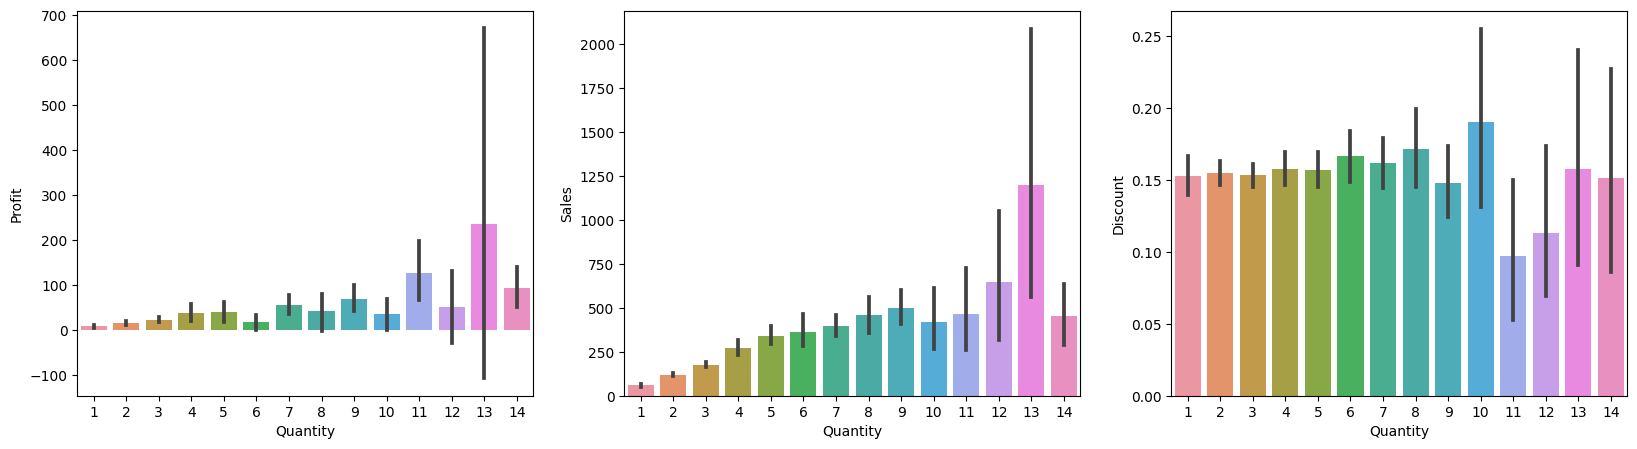

In [19]:
# Check Profit, Sales, and Discount for each quantity
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(x='Quantity', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Quantity', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Quantity', y='Discount', data=df, ax=ax[2])
plt.show()

* quantity 13 is the highest in sales and profit but number 10 is the highest in discount and gain lower profit
* we need to balance between quantity and discount

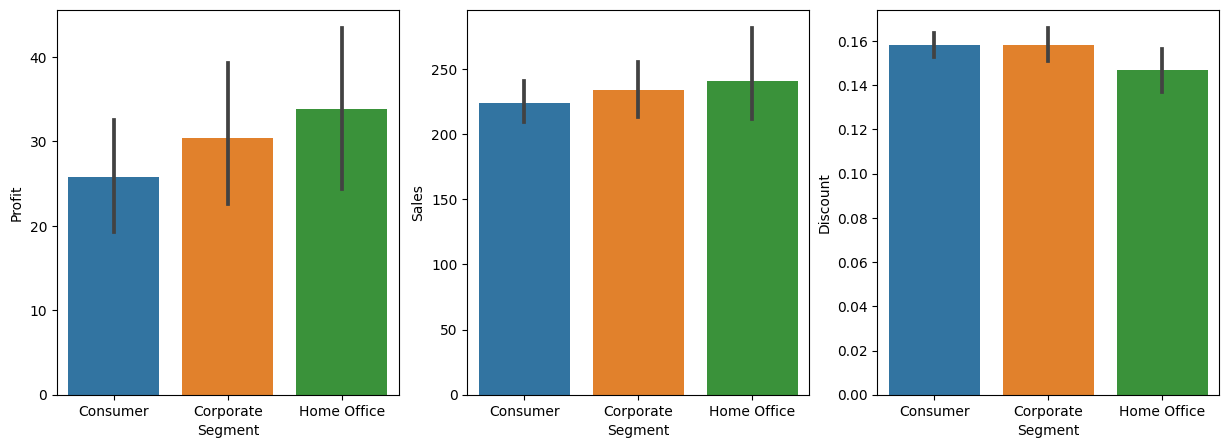

In [20]:
# Check Profit, Sales and Discount for each segment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Segment', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Segment', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Segment', y='Discount', data=df, ax=ax[2])
plt.show()

* The Home Office offers the smallest discount but also achieves the highest profits from sales.

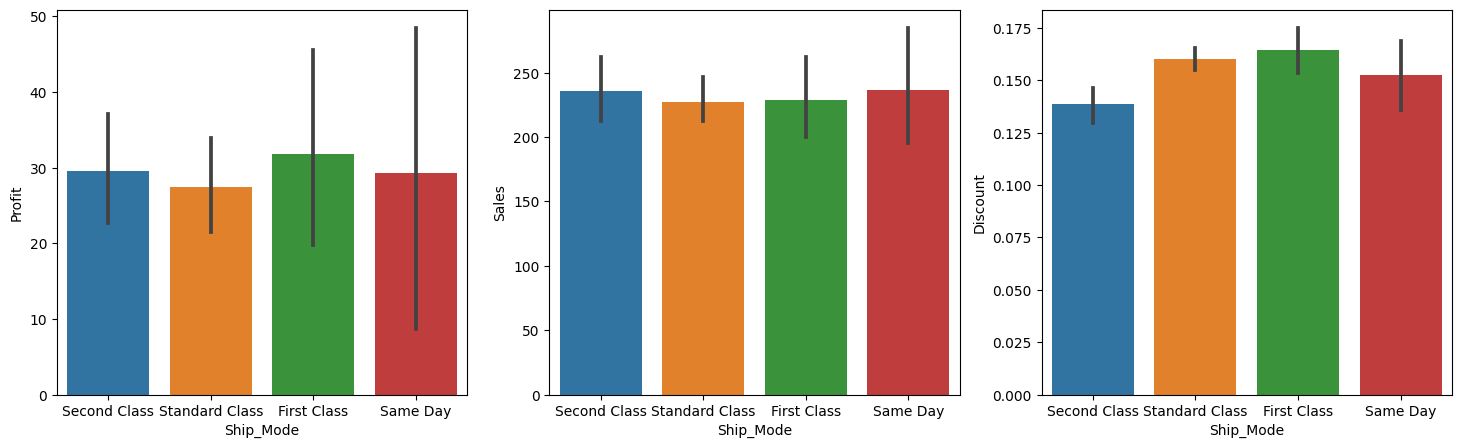

In [21]:
# Check Profit, Sales and Discount for each Ship Mode
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x='Ship_Mode', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Ship_Mode', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Ship_Mode', y='Discount', data=df, ax=ax[2])
plt.show()

* Same day shipping records the most sales, while First Class offers the highest discount, but it also results in the highest profits

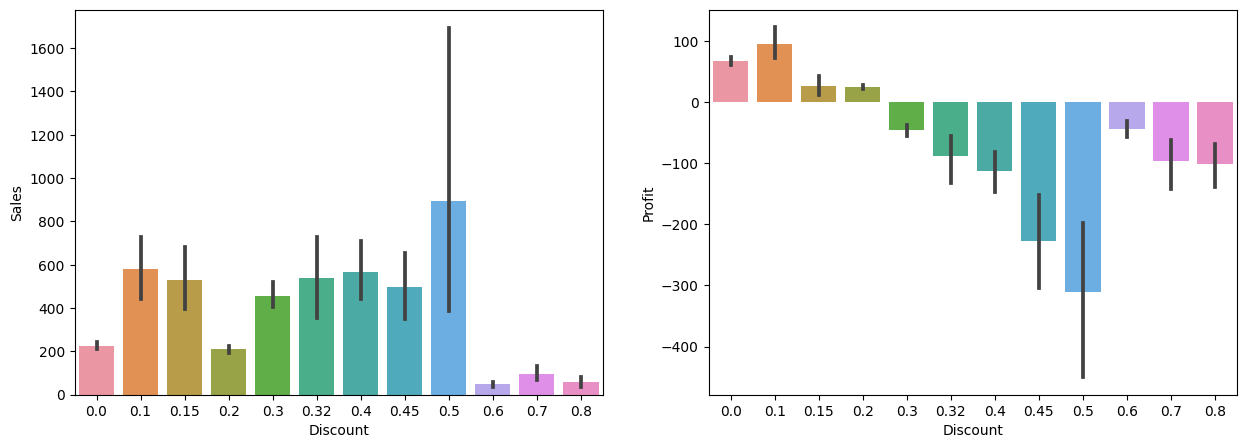

In [22]:
# Check discount impact to profit and sales
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='Discount', y='Sales', data=df, ax=ax[0])
sns.barplot(x='Discount', y='Profit', data=df, ax=ax[1])
plt.show()

* we note when the discount is increased, profits tend to turn negative.

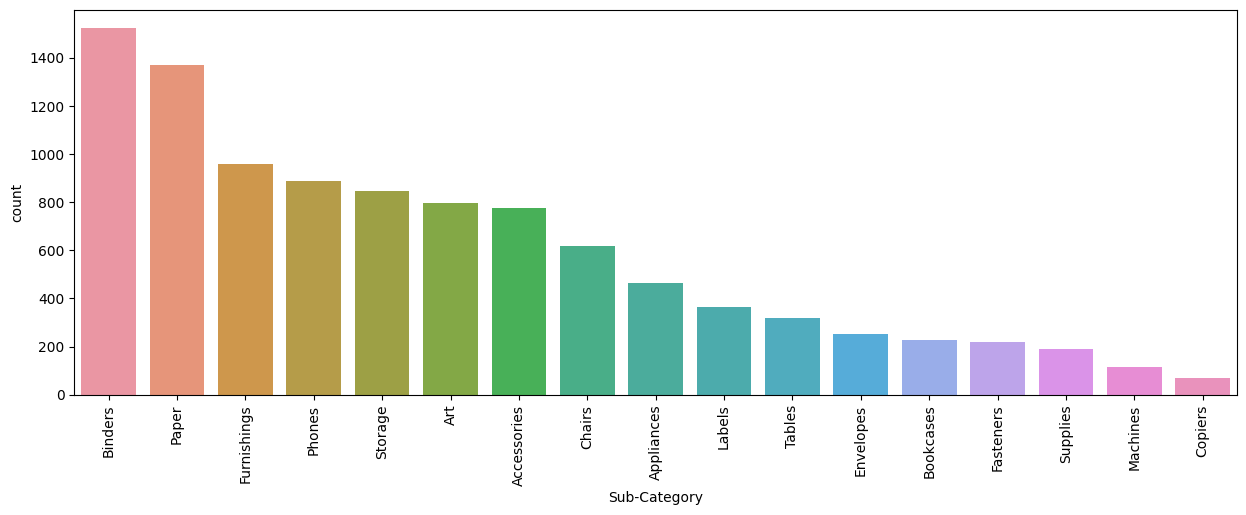

In [23]:
# Product with the highest count
plt.figure(figsize=(15, 5))
sns.countplot(x='Sub-Category', data=df, order=df['Sub-Category'].value_counts().index);
plt.xticks(rotation=90);
plt.show()

Sales of Binders and paper are the highest

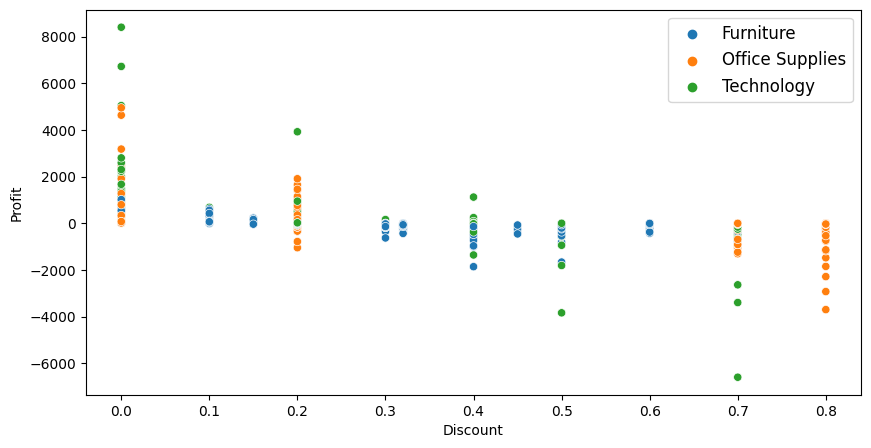

In [24]:
# Category with discount and profit
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=df);
ax.legend(fontsize=12)
plt.show()

* Office Supplies incur the highest losses at an 80% discount
* Furniture and Technology experience their greatest losses within the range of 30% to 50%.
* Technology also suffers its most significant profit loss at a 70% discount.

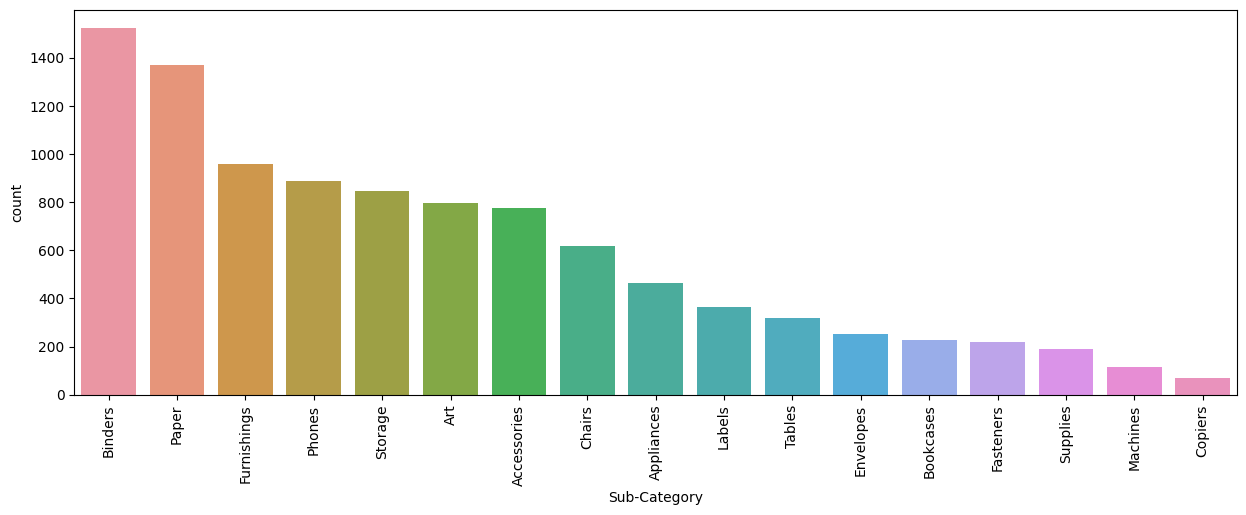

In [25]:
#check number of each sub-category
plt.figure(figsize=(15, 5))
sns.countplot(x='Sub-Category', data=df, order=df['Sub-Category'].value_counts().index);
plt.xticks(rotation=90);
plt.show()

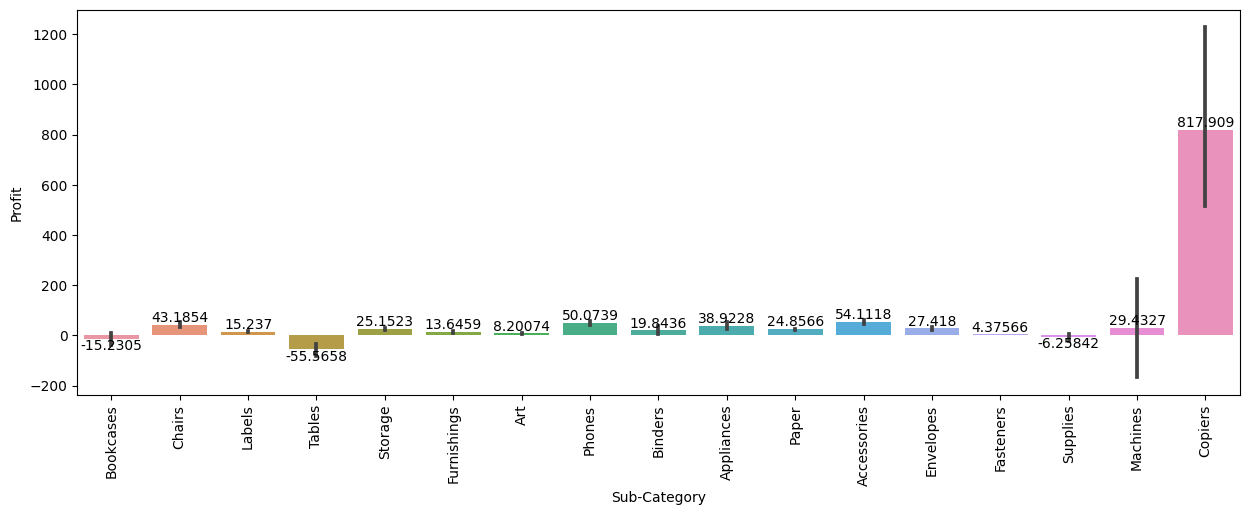

In [26]:
# check Sub-category with profit
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Sub-Category', y='Profit', data=df);
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()


In [27]:
#Check with each states
states = df.groupby('State').sum().sort_values('Sales', ascending=False)
states.reset_index(inplace=True)

<ipython-input-27-4fb6d9582308>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states = df.groupby('State').sum().sort_values('Sales', ascending=False)


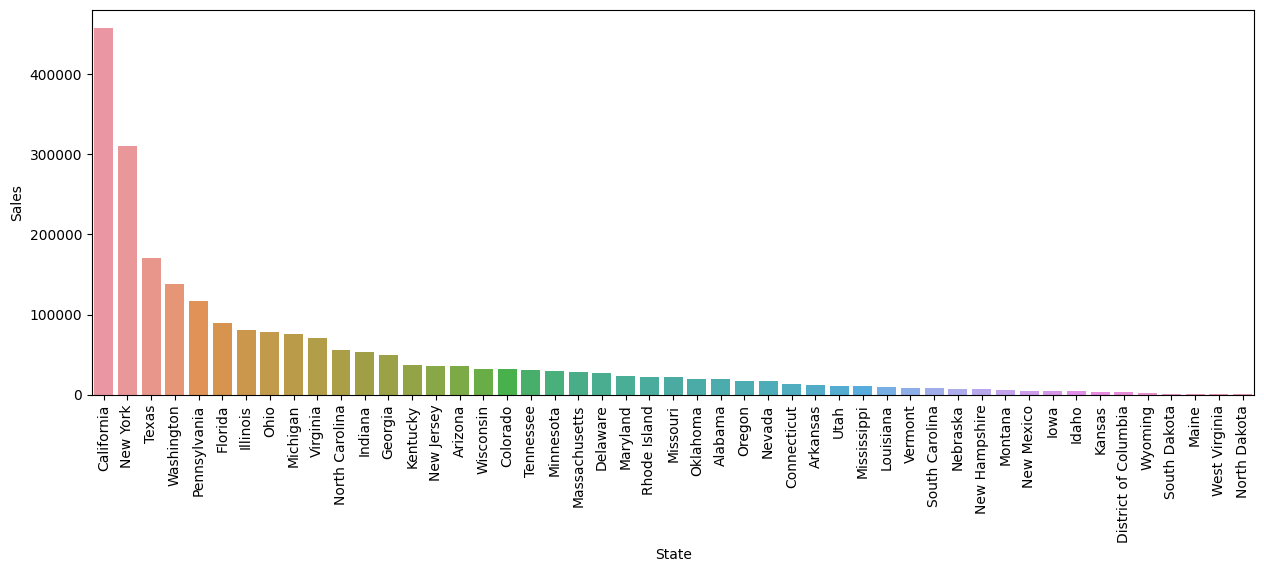

In [28]:
# Sales
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='State', y='Sales', data=states);
plt.xticks(rotation=90)
plt.show()

* California and New York lead in sales, while many other states have lower sales.

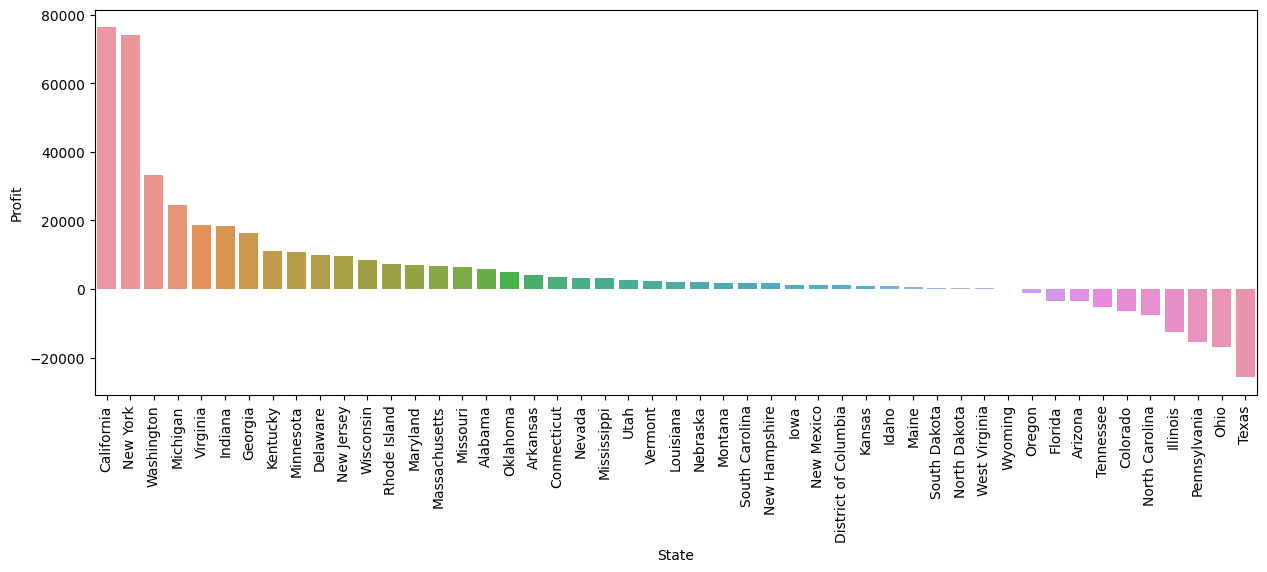

In [29]:
#Profit
fig, ax = plt.subplots(figsize=(15, 5))
states = states.sort_values('Profit', ascending=False)
sns.barplot(x='State', y='Profit', data=states);
plt.xticks(rotation=90)
plt.show()

*
California and New York generate the highest profits, while some states have strong sales but negative profits.

<ipython-input-30-31f406225bff>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states= df.groupby(['State']).sum().sort_values('Discount', ascending=False)


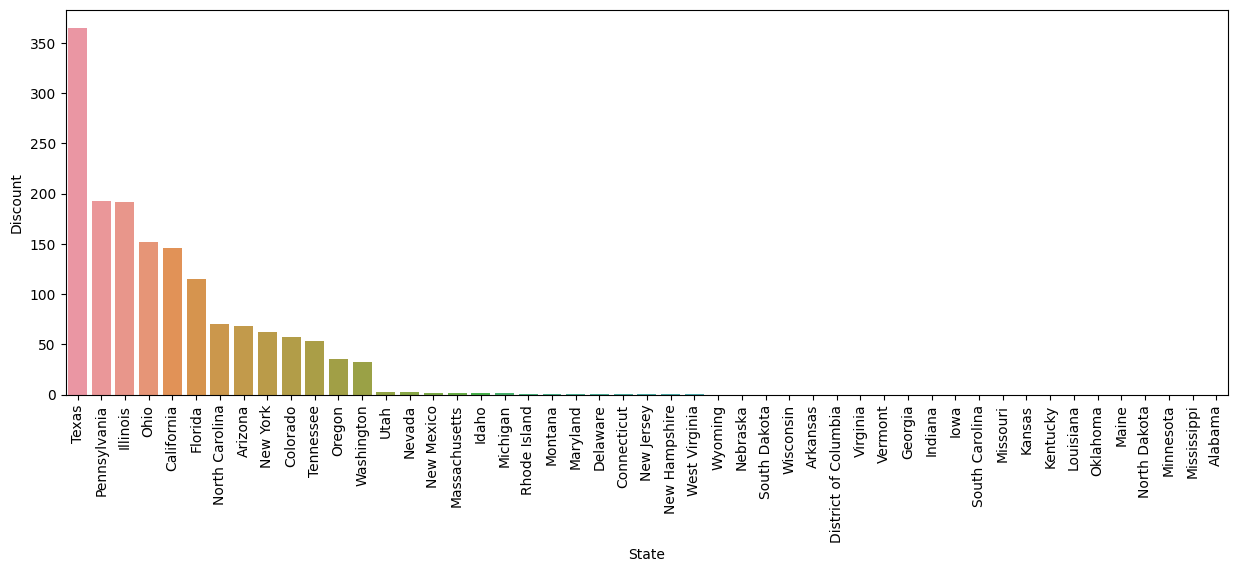

In [30]:
# Discount
states= df.groupby(['State']).sum().sort_values('Discount', ascending=False)
states.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='State', y='Discount', data=states)
plt.xticks(rotation=90)
plt.show();

* High discounts can sometimes result in profit losses, and this can be observed.

# **Insights**

By analyzing the data, we can identify various business issues:

* Technology outperforms Furniture in terms of profit.
* Same-day shipping leads to higher sales.
* The West region is the most profitable.
* Vermont state achieves good profits despite low sales.
* Discounts of 50% and less result in higher profits.
* Offering more discounts in Furniture is necessary to attract customers.
* In the Consumer segment, more discounts are needed, while Home-Office should be promoted to boost profits.

The areas where managers can improve profitability:

* The relationship between sales and profit are not linear in most states.
* The Central region need more focus.
* Furniture and Office Supplies experience significant profit losses with high discounts.
* Office Supplies incur maximum losses at both 80% and 0% discounts.
* Furniture and Technology face their highest losses between 30% to 50% discounts.
* Technology also records its maximum profit loss at a 70% discount.
Tables, Supplies, and Bookcases within the sub-category show negative profits.